<div class="alert alert-block alert-success">
    
    
## <center> OnMart Superstore </center>


<br>

**Author: Atef Bader**

**Created: 8/19/2021**
    
<br>
Date: 31 October 2021<br>
Edited by: Dr. Dill and Dr. Arroyo - Nov 2021<br>
- Assigned points to each question<br>
- Clarified each question <br>
- Added bonus questions
    <br>
Edited by: sd v2.1 May 2022<br>
- defined orderreturned variable<br>
- clarified R6, R7
    
    
</div>

<div class="alert alert-block alert-danger">
    
    

### Deliverables: 
- Submit on Canvas two files with the format of <b>Lastname_Assignment_5</b>:
    1. Your IPYNB script that has your source code and output for the requirements listed below
    2. Your HTML document that has your source code and output for the requirements listed below

<br>
    
</div>


<div class="alert alert-info">



        
## High Level Description:

The OnMart superstore is an online retailer that has a business model similar to Amazon, Walmart, and Target. The online superstore has several departments that are selling products in different categories: Electronics, Clothing, Grocery, Furniture, Sports, etc.

<hr style="border:5px solid orange"> </hr>
</div>


<div class="alert alert-info">




        
## Logistic and Supply Chain Network:


For its supply chain and its delivery network/vehicles, OnMart has several warehouses and distributions centers. Every warehouse supplies a number of distribution centers and every distribution center delivers packages in different zip codes.  
    

The logistics and supply chain network for OnMart has the following characteristics:
1.	It delivers packages to customers distributed across 785 zip codes 
2.	It has 97 distribution centers that are located in 97 zip codes
3.	It has 17 warehouses that are located in 17 zip codes
4.	It serves customers in 8 cities located in different states in the US
5.	Every serving facility (distribution center or warehouse) has a unique pair of latitude and longitude 

Even though OnMart has many warehouses that supply distribution centers in the different cities, not every city has warehouses; Nashville and Atlanta do not have warehouses. Currently, Nashville is being supplied by products shipped from Chicago warehouses and Atlanta is being supplied by products shipped from Miami warehouses.  The following figure illustrates the structure of the OnMart delivery network:

   
    
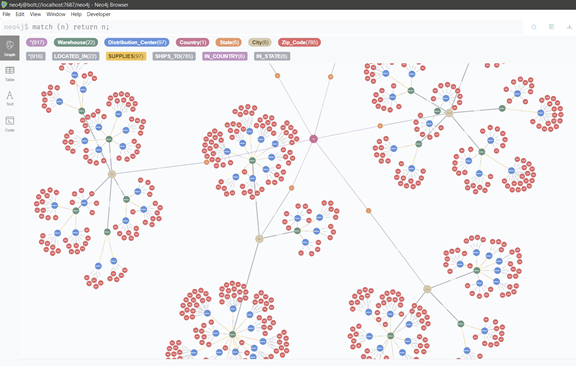
    

    
</div>




<hr style="border:5px solid orange"> </hr>


<div class="alert alert-info">

    
The following is a sample of the delivery zip codes, warehouses, distribution centers, cities, and state:
<br>
<br>

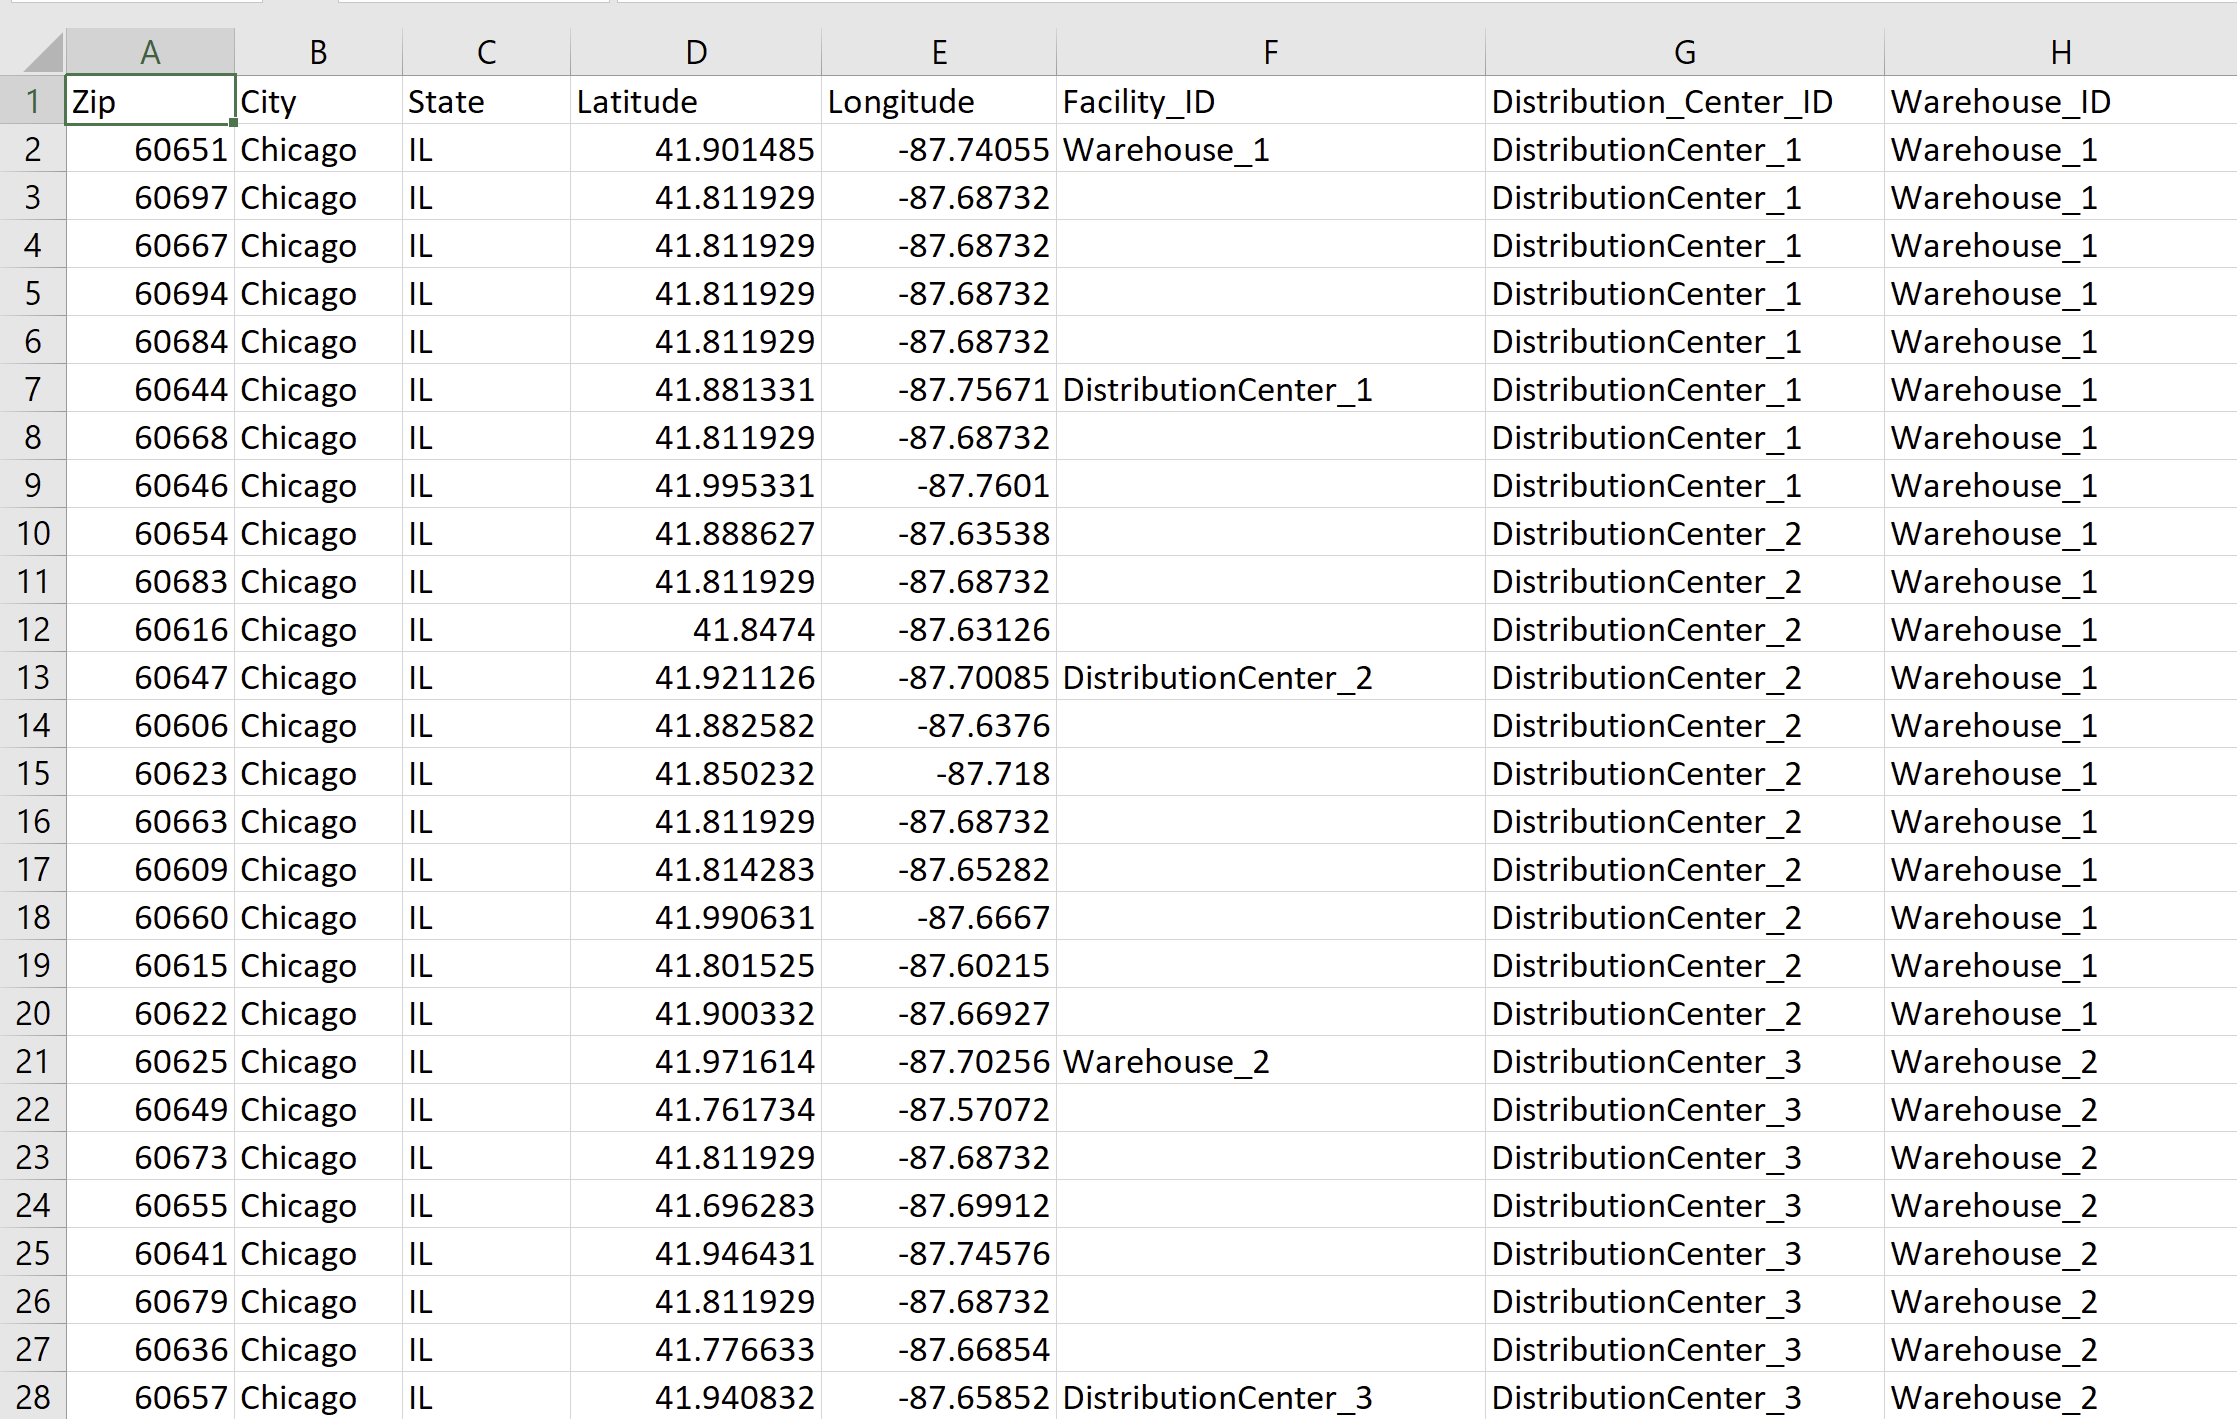

<hr style="border:5px solid orange"> </hr>

</div>

<div class="alert alert-info">

# Departments and Products
OnMart has several departments that are selling products in different categories.  The following is a sample of these departments and the different product categories they sell:


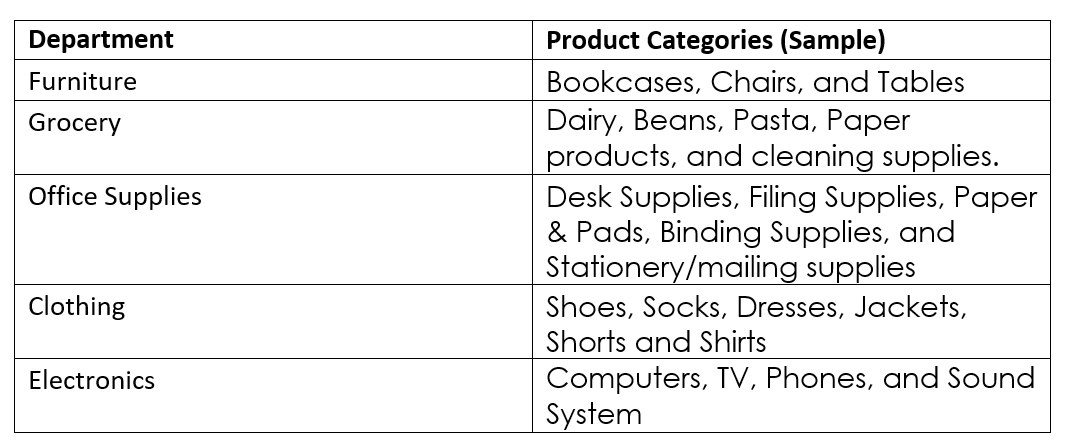

<hr style="border:5px solid orange"> </hr>

</div>

<div class="alert alert-info">

# Customers and Purchases


Customers place their orders online and the order might have products from the different categories in the different departments. For every order there will be a unique order number generated. When the customers place the order online, the customer will enter home address, delivery address, and shipping class. 

<br>

The customer is provided with the following capabilities:
- Purchase items.
- Return purchased items. 
- Review and rate purchased items.
- Some customers are connected with friends in a Social Network and can share product description of purchased items with friends in the social network.

<hr style="border:5px solid orange"> </hr>

</div>

<div class="alert alert-info">

<b>Connection instructions</b>
- Connect to NU VPN
- Connect to DSCC Postgres Server via psycog2 connection string (provided in code below)
- Connect to **onmart** database (provided in code below)
- Use the two tables: **transactions_log** and **logistics_supply_chain_network**


<hr style="border:5px solid orange"> </hr>


<br>
</div>

In [1]:
import pandas as pd
import datetime
from datetime import datetime, date, timedelta
import time
import numpy as np
import plotly
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import psycopg2
import csv

from area import area

from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT 
from IPython.display import display

In [2]:
# allow muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Check versions:

In [3]:
from platform import python_version
print('python version installed     :', python_version(),'    ,needed: 3.7.7 or higher')
print('plotly version installed     :', plotly.__version__,'   ,needed: 4.14.3 or higher')
print('matplotlib version installed :', matplotlib.__version__,'    ,needed: 3.2.2 or higher')
print('numpy version installed      :', np.__version__,'    ,needed: 1.19.5 or higher')


python version installed     : 3.9.12     ,needed: 3.7.7 or higher
plotly version installed     : 5.6.0    ,needed: 4.14.3 or higher
matplotlib version installed : 3.5.1     ,needed: 3.2.2 or higher
numpy version installed      : 1.21.5     ,needed: 1.19.5 or higher


In [4]:
# Connect to onmart database on Postgres

db_connection = psycopg2.connect(host='129.105.248.26',dbname="onmart", user="mem9900")

cursor = db_connection.cursor()

In [5]:
# Get the column names for table transactions_log

cursor.execute("SELECT column_name \
                FROM INFORMATION_SCHEMA.COLUMNS \
                WHERE table_name = 'transactions_log';")

rows=cursor.fetchall()

rows

[('customerid',),
 ('firstname',),
 ('lastname',),
 ('creditcardnumber',),
 ('orderid',),
 ('purchasedate',),
 ('expecteddeliverydate',),
 ('actualdeliverydate',),
 ('productid',),
 ('department',),
 ('category',),
 ('itempurchased',),
 ('quantity',),
 ('price',),
 ('shippingcost',),
 ('discount',),
 ('sales',),
 ('profit',),
 ('deliveryzipcode',),
 ('homezipcode',),
 ('segment',),
 ('orderpriority',),
 ('orderreturned',),
 ('rating',),
 ('reviewid',),
 ('friends',),
 ('sharedwith',)]

In [6]:
# Load the table transactions_log into a dataframe:
#dfTrans = pd.read_sql_query("select * from transactions_log", db_connection)
#dfTrans.head()
#dfTrans.info()

In [7]:
# create a dataframe for transaction_log - note the limit to 5000 records
query = '''SELECT * 
            FROM transactions_log
            LIMIT 5000;'''

cursor.execute(query)
data = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
#create dataframe with column headers
customers = pd.DataFrame(data, columns = colnames)
customers.info()
customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerid            5000 non-null   object 
 1   firstname             5000 non-null   object 
 2   lastname              5000 non-null   object 
 3   creditcardnumber      5000 non-null   object 
 4   orderid               5000 non-null   object 
 5   purchasedate          5000 non-null   object 
 6   expecteddeliverydate  5000 non-null   object 
 7   actualdeliverydate    5000 non-null   object 
 8   productid             5000 non-null   object 
 9   department            5000 non-null   object 
 10  category              5000 non-null   object 
 11  itempurchased         5000 non-null   object 
 12  quantity              5000 non-null   int64  
 13  price                 5000 non-null   float64
 14  shippingcost          5000 non-null   float64
 15  discount             

,customerid,firstname,lastname,creditcardnumber,orderid,purchasedate,expecteddeliverydate,actualdeliverydate,productid,department,...,profit,deliveryzipcode,homezipcode,segment,orderpriority,orderreturned,rating,reviewid,friends,sharedwith
0,619-40-3724,Anastacio,Heller,xxxx-xxxx-xxxx-3412,29b01415-de99-48c8-8b65-c6c8793c9d6d,2019-11-25,2019-11-29,2019-12-03,ELE-CO-0186-403,Electronics,...,17.6869,75203,75203,Home Office,medium,No,4,01415-de99,245-10-9150;045-47-5227;708-17-0798;518-43-0213,
1,399-75-5058,Madison,Smitham,xxxx-xxxx-xxxx-8172,ce94b841-c8fc-426d-851b-2818226bc192,2019-11-14,2019-11-18,2019-11-22,CLO-TS-2420-885,Clothing,...,10.7676,30304,30304,Consumer,Critical,No,5,4b841-c8fc,070-37-6453;159-30-1844;470-93-9558;446-12-8507,446-12-8507
2,281-12-4880,Curtis,Stark,xxxx-xxxx-xxxx-6285,7dd0417d-5e40-4c40-b79d-7704c2ff6b7a,2019-02-23,2019-02-27,2019-03-03,CLO-SH-2867-522,Clothing,...,2.7270,75237,75237,Consumer,High,No,3,0417d-5e40,070-33-4355;492-18-2552;383-70-9684,070-33-4355;492-18-2552
3,308-13-7100,Ariel,Williamson,xxxx-xxxx-xxxx-0907,afcafe81-ef09-472d-b82f-790dbec36031,2020-10-08,2020-10-12,2020-10-16,ELE-MA-7507-996,Electronics,...,568.9500,2196,2196,Consumer,low,No,1,afe81-ef09,214-20-2685;128-25-3268,214-20-2685;128-25-3268
4,885-22-7183,Sharon,Lakin,xxxx-xxxx-xxxx-4054,4921c166-0be6-4809-bdff-8242c357d44e,2018-11-25,2018-11-29,2018-12-03,SPO-FI-2419-875,Sports,...,290.2140,10153,10153,Home Office,Critical,No,2,,,


In [8]:
# check out customer

cursor.execute("SELECT * \
                FROM transactions_log \
                Where customerid = '004-81-0268';")

rows = cursor.fetchall()

rows

[('004-81-0268',
  'Lydia',
  'Turner',
  'xxxx-xxxx-xxxx-5873',
  '5d585c1e-1df4-4eb2-8bc5-aba8dc173087',
  datetime.date(2019, 10, 8),
  datetime.date(2019, 10, 12),
  datetime.date(2019, 10, 12),
  'ELE-CO-2076-686',
  'Electronics',
  'Copiers',
  'HP Multipurpose Laser Scanner',
  2,
  540.26,
  24.2,
  20.51,
  1084.21,
  119.2631,
  '30309',
  '30309',
  'Consumer',
  'High',
  'No',
  5,
  '',
  '',
  '')]

In [9]:
# Get the column names for table logistics_supply_chain_network

cursor.execute("SELECT column_name \
                FROM INFORMATION_SCHEMA.COLUMNS \
                WHERE table_name = 'logistics_supply_chain_network';")

rows=cursor.fetchall()

rows

[('zipcode',),
 ('city',),
 ('state',),
 ('latitude',),
 ('longitude',),
 ('facility_id',),
 ('distribution_center_id',),
 ('warehouse_id',),
 ('where_is',)]

In [10]:
# create dataframe for the supply chain network table
query = '''SELECT * 
            FROM logistics_supply_chain_network;'''

cursor.execute(query)
data = cursor.fetchall()

colnames = [desc[0] for desc in cursor.description]
#create dataframe with column headers
centers = pd.DataFrame(data, columns = colnames).drop_duplicates()
centers.info()
centers.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 785 entries, 0 to 784
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   zipcode                 785 non-null    object 
 1   city                    785 non-null    object 
 2   state                   785 non-null    object 
 3   latitude                785 non-null    float64
 4   longitude               785 non-null    float64
 5   facility_id             785 non-null    object 
 6   distribution_center_id  785 non-null    object 
 7   warehouse_id            785 non-null    object 
 8   where_is                0 non-null      object 
dtypes: float64(2), object(7)
memory usage: 61.3+ KB


,zipcode,city,state,latitude,longitude,facility_id,distribution_center_id,warehouse_id,where_is
0,60651,Chicago,IL,41.901485,-87.74055,Warehouse_1,DistributionCenter_1,Warehouse_1,None
1,60697,Chicago,IL,41.811929,-87.68732,,DistributionCenter_1,Warehouse_1,None
2,60667,Chicago,IL,41.811929,-87.68732,,DistributionCenter_1,Warehouse_1,None
3,60694,Chicago,IL,41.811929,-87.68732,,DistributionCenter_1,Warehouse_1,None
4,60684,Chicago,IL,41.811929,-87.68732,,DistributionCenter_1,Warehouse_1,None


In [11]:
# check out zips
centers['zipcode'].nunique()

785

In [12]:
# check out locations
centers['facility_id'].nunique()
centers['distribution_center_id'].nunique()
centers['warehouse_id'].nunique()

119

97

22

In [13]:
# what states are there?
centers['state'].value_counts()

NY    166
TX    123
GA    111
CA    100
FL     96
IL     85
MA     54
TN     44
NJ      1
MI      1
NC      1
PA      1
IA      1
VA      1
Name: state, dtype: int64


<div class="alert alert-info">
<hr style="border:5px solid orange"> </hr>

    

### Complete all requirements listed below
- Write your code in the cell below every requirement


#### NOTE:
- A sale is when orderreturned = 'No'
- A return is when orderreturned = 'Yes'


<hr style="border:5px solid orange"> </hr>

    
</div>


In [14]:
# Uncomment and run this code after a query fails

# if you do a query and it fails and then try a subsequent query,
# you may get a connection lost message. This code below re-establishes 
# the connection.

db_connection.rollback()

<div class="alert alert-block alert-danger">
    
    

### Requirement 1 (5 points): 
- To see the delivery zip code with the most returns, count the total number of order returns per Delivery Zip Code. Show the top five zip codes with their count.  **( Use SQL - Postgres )**





<br>
    
</div>

In [15]:
query = '''SELECT deliveryzipcode, COUNT(*) AS totalreturns \
           FROM transactions_log \
           WHERE orderreturned = 'Yes' \
           GROUP BY deliveryzipcode \
           ORDER BY 2 DESC'''

cursor.execute(query)
r1data = cursor.fetchall()

total_returns_by_zip = pd.DataFrame(r1data, columns=['zip_code','num_returns'])
total_returns_by_zip.head()

,zip_code,num_returns
0,75202,1421
1,60660,1411
2,75210,1395
3,75218,1386
4,60649,1386


<div class="alert alert-block alert-danger">
    
    

### Requirement 2 (5 points): 
-  Which product categories had the most returns? We want to know the number of returns by the category and the delivery zip code. Count the total number of orders for every product category in every Delivery Zip Code. The output should show the category, the zip code and the count; show the top 10.  **( Use SQL - Postgres )**






<br>
    
</div>

In [16]:
query = '''SELECT category, deliveryzipcode, COUNT(*) AS totalreturns \
           FROM transactions_log \
           WHERE orderreturned = 'Yes' \
           GROUP BY 1,2 \
           ORDER BY 3 DESC'''

cursor.execute(query)
r2data = cursor.fetchall()

total_returns_by_cat_zip = pd.DataFrame(r2data, columns=['productcategory','zip_code','num_returns'])
total_returns_by_cat_zip.head(10)

,productcategory,zip_code,num_returns
0,Shorts,60643,146
1,Shorts,60614,143
2,Shorts,75202,141
3,TShirt,60660,136
4,TShirt,75212,136
5,TShirt,60646,133
6,Shorts,75210,131
7,TShirt,60678,130
8,TShirt,60626,130
9,Shorts,60603,129


<div class="alert alert-block alert-danger">
    
    

### Requirement 3 (5 points): 
Calculate the total sales per Delivery Zip Code; Use the <b>sales</b> column for your total sales value. Sort by total sales with the highest amount showing on top.  **( Use SQL - Postgres )**






<br>
    
</div>

In [17]:
query = '''SELECT deliveryzipcode, SUM(sales) AS totalsales \
           FROM transactions_log \
           WHERE orderreturned = 'No' \
           GROUP BY 1 \
           ORDER BY 2 DESC'''

cursor.execute(query)
r3data = cursor.fetchall()

total_sales_by_zip = pd.DataFrame(r3data, columns=['zip_code','total_sales'])
total_sales_by_zip.head(10)

,zip_code,total_sales
0,60646,5390225.50
1,60636,5387623.56
2,60615,5326253.69
3,60679,5313395.83
4,75225,5303349.34
5,75223,5300779.12
6,75224,5293653.40
7,60626,5288303.16
8,60611,5265130.62
9,60692,5239630.79


<div class="alert alert-block alert-danger">
    
    

### Requirement 4 (15 points): 
- **Part 1: ( Use Python - SQL - Postgres )**
- Use Seaborn to create a product category side-by-side BoxPlot Chart. <br>
- The boxplots will show the total sales (sum) for every delivery zip code on the (y-axis) for every product category (x-axis). 
- Suggest to create a dataframe with deliveryzipcode, category and sales and use this dataframe for the boxplots.
- <b> Part 2: </b>
- In a Markdown cell, explain the insights from the Boxplots<br>
    
https://seaborn.pydata.org/generated/seaborn.boxplot.html





<br>
    
</div>

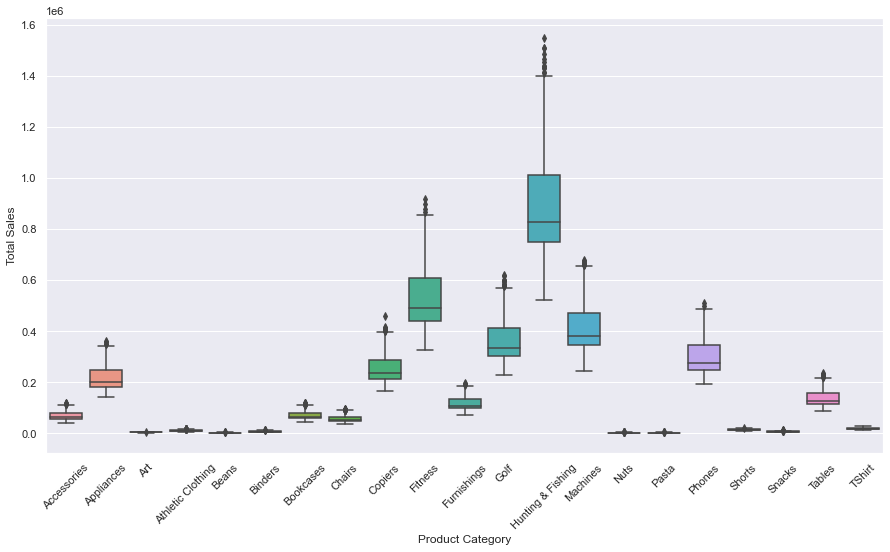

In [18]:
query = '''SELECT deliveryzipcode, category, SUM(sales) AS totalsales \
           FROM transactions_log \
           WHERE orderreturned = 'No' \
           GROUP BY 1,2 \
           ORDER BY 2'''

cursor.execute(query)
r4data = cursor.fetchall()

r4 = pd.DataFrame(r4data, columns=['Zip Code','Product Category','Total Sales'])

sns.set(rc={'figure.figsize':(15,8)})
r4_figure = sns.boxplot(x=r4['Product Category'],y=r4['Total Sales'])
r4_figure.tick_params(axis='x', rotation=45)


The Boxplots show that Hunting & Fishing have the most total sales (excludes returned products), followed by Fitness and Machines. The Hunting & Fishing sales may also be right skewed as it has a long tail for the top 25% of data and outliers on the higher end.

<div class="alert alert-block alert-danger">
    
    

### Requirement 5 (15 points): 
- Calculate the total number of orders per product category per Home Zip Code per purchase month. Sort by home zip code, cateogry and month and show the first 12 records. **( Use Python - SQL - Postgres )**
<br><br>
    
You can use either Python or SQL to create the month field. If you want to try SQL, here is one of many sources of info: https://www.postgresqltutorial.com/postgresql-extract/






<br>
    
</div>

In [19]:
query = '''SELECT homezipcode, category, EXTRACT(MONTH from purchasedate) AS purchasemonth, \
           COUNT(*) AS numorders
           FROM transactions_log \
           GROUP BY 1,2,3
           ORDER BY 1,2,3'''

cursor.execute(query)
r5data = cursor.fetchall()

r5 = pd.DataFrame(r5data, columns=['Home Zip Code','Product Category','Purchase Month','Num Orders'])
r5.head(12)

,Home Zip Code,Product Category,Purchase Month,Num Orders
0,10001,Accessories,1.0,23
1,10001,Accessories,2.0,31
2,10001,Accessories,3.0,8
3,10001,Accessories,4.0,10
4,10001,Accessories,5.0,8
5,10001,Accessories,6.0,22
6,10001,Accessories,7.0,15
7,10001,Accessories,8.0,11
8,10001,Accessories,9.0,14
9,10001,Accessories,10.0,17


<div class="alert alert-block alert-danger">
    
 

### Requirement 6 (15 points): 
- Use Seaborn (FacetGrid and scatterplot) to create six scatter plots, one for each delivery zipcode in the list of zipcodes [60623, 60663, 60609, 60660, 60615, 60622].
- Each zip code should appear in its own chart.
- Only include sales in 2020.
- Plot the daily sales for these categories: Athletic Clothing, Fitness, Golf, Hunting & Fishing, Shorts
- The colors in the plots should represent the categories.
- **( Use Python - SQL - Postgres )**
    
<br>
Reference: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html 
<br>
    
</div>

In [20]:
query = '''SELECT * \
           FROM transactions_log \
           WHERE deliveryzipcode IN ('60623', '60663', '60609', '60660', '60615', '60622') \
           AND EXTRACT(YEAR FROM purchasedate) = '2020' \
           AND category IN ('Athletic Clothing', 'Fitness', 'Golf', 'Hunting & Fishing', 'Shorts') \
           AND orderreturned = 'No' '''

cursor.execute(query)
r6data = cursor.fetchall()

r6colnames = [desc[0] for desc in cursor.description]
r6 = pd.DataFrame(r6data, columns = r6colnames)
r6["purchasedate"].value_counts().sort_index()
r6["deliveryzipcode"].value_counts()
r6["category"].value_counts()

2020-01-01    14
2020-01-02    17
2020-01-03     4
2020-01-04     6
2020-01-05     3
              ..
2020-12-27     5
2020-12-28     3
2020-12-29     8
2020-12-30    11
2020-12-31    10
Name: purchasedate, Length: 315, dtype: int64

60615    468
60609    445
60660    434
60622    426
60623    412
60663    395
Name: deliveryzipcode, dtype: int64

Shorts               881
Fitness              457
Hunting & Fishing    420
Athletic Clothing    418
Golf                 404
Name: category, dtype: int64

/var/folders/d8/4y6lts65607d03m35rqyx0zm0000gn/T/ipykernel_75799/2170619430.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


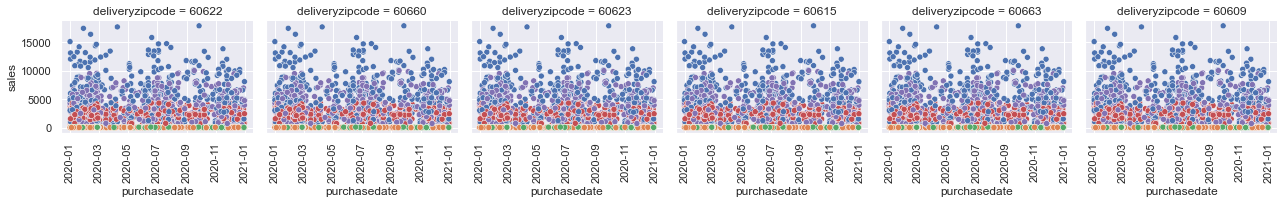

In [21]:
r6figure = sns.FacetGrid(r6, col="deliveryzipcode")
r6figure.map(sns.scatterplot, x=r6["purchasedate"],y=r6["sales"],hue=r6["category"])

for axes in r6figure.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

<div class="alert alert-block alert-danger">
    
    
### Requirement 7 (5 points):
- List the top 10 distribution centers that have **highest** number of delayed deliveries on sales (not returns)? Show the distribution center ID, the city and the number of delayed deliveries. **( Use Python - SQL - Postgres )**





    
</div>

In [22]:
query = '''SELECT l."distribution_center_id", l."city", COUNT(t.*) AS numdelays \
           FROM transactions_log AS t \
           JOIN logistics_supply_chain_network AS l \
           ON t."deliveryzipcode" = l."zipcode" \
           WHERE orderreturned = 'No' \
           AND t."actualdeliverydate" > t."expecteddeliverydate" \
           GROUP BY 1, 2 \
           ORDER BY 3 DESC'''

cursor.execute(query)
r7data = cursor.fetchall()

r7colnames = [desc[0] for desc in cursor.description]
r7 = pd.DataFrame(r7data, columns = r7colnames)

r7.head(10)

,distribution_center_id,city,numdelays
0,DistributionCenter_14,New York,59389
1,DistributionCenter_6,Chicago,58145
2,DistributionCenter_19,New York,56158
3,DistributionCenter_21,New York,49499
4,DistributionCenter_22,New York,49451
5,DistributionCenter_94,Atlanta,46939
6,DistributionCenter_2,Chicago,45341
7,DistributionCenter_89,Atlanta,44700
8,DistributionCenter_95,Atlanta,41852
9,DistributionCenter_3,Chicago,41331


<div class="alert alert-block alert-danger">
    
    

### Requirement 8 (15 points): 
- Find the most **influential product reviewer** for every product sale.
    - Note: the **influential product reviewer** is the customer who rated the product either 5 or 1, wrote a review for the product, has the highest number of friends, and shared it with the highest number of friends.  **( Use Python - SQL - Postgres )**
    - In the following example customer c3 is the most influential reviewer (list is sorted decending by the **count** of sharedwith and friends)

  
<dl>
<dt>Example:</dt>
<dd>1.   c3 : sharedwith=5, friends=10</dd>
<dd>2.   c1 : sharedwith=4, friends=15</dd>
<dd>3.   c2 : sharedwith=4, friends=10</dd>
<dd>4.   c5 : sharedwith=3, friends=12</dd>
<dd>5.   c4 : sharedwith=3, friends=10</dd>
        
</dl>





<br>
    
</div>

### Hints for Requirement 8
1. Select all your data
2. Parse the friends field to get a count and store in your dataframe
3. Parse the sharedwith field to get a count and store in your dataframe
4. Sort output by sharewith count and friends count
<br>

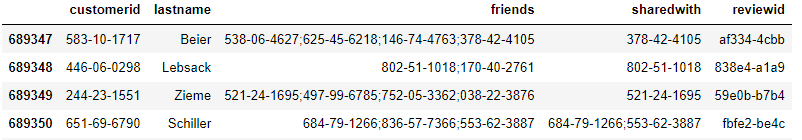

In [23]:
#gets customers with a sale (not returned), has a review id, and rating of 5 or 1.
query = '''SELECT customerid, firstname, lastname, productid, rating, reviewid, friends, sharedwith \
           FROM transactions_log \
           WHERE orderreturned = 'No' \
           AND reviewid <> '' \
           AND (rating = 5 OR rating = 1) '''

cursor.execute(query)
r8data = cursor.fetchall()

r8colnames = [desc[0] for desc in cursor.description]
r8 = pd.DataFrame(r8data, columns = r8colnames)

r8.head(10)

,customerid,firstname,lastname,productid,rating,reviewid,friends,sharedwith
0,648-87-7671,Coleman,Quitzon,OFF-AR-7364-045,5,f9d46-6887,584-30-8455;892-38-8706;712-01-6863,892-38-8706;712-01-6863
1,114-30-0059,Clifton,Kshlerin,ELE-AC-8224-744,5,2dfa1-a10c,,
2,289-31-2511,Kimberly,Muller,ELE-CO-8183-255,5,7a2fa-e802,768-92-3653;602-36-7200,768-92-3653;602-36-7200
3,849-76-1326,Piper,Gulgowski,FUR-CH-8803-153,5,db6b9-133a,531-97-4814;012-41-8591;544-14-7864,531-97-4814
4,802-59-9409,Serenity,Legros,OFF-AP-5157-268,1,775c0-9c90,589-30-0634;437-77-7384;016-15-7784;561-39-7630,589-30-0634;437-77-7384;561-39-7630
5,008-50-5468,Carlos,Reichert,SPO-GO-6230-403,5,001dd-2166,780-88-2631,780-88-2631
6,120-69-6407,Trevion,Gutmann,ELE-CO-0464-718,5,739d7-8fa5,,
7,124-79-7137,Billie,Erdman,GRO-BE-1705-940,5,59236-cd9d,787-35-0854,787-35-0854
8,898-27-9054,Zita,Carroll,FUR-BO-2340-033,5,84d44-8139,,
9,591-48-7015,Karine,Cruickshank,CLO-SH-2136-573,5,4dee6-f71e,,


In [24]:
#get every customer and their friends
r8friends = r8[['customerid','friends']]

In [25]:
r8friends['friends'] = r8friends['friends'].str.split(';')

r8friends = r8friends.explode('friends', ignore_index=True)

/var/folders/d8/4y6lts65607d03m35rqyx0zm0000gn/T/ipykernel_75799/1381241880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r8friends['friends'] = r8friends['friends'].str.split(';')


In [26]:
#get numfriends for every customer
numfriends = r8friends.groupby('customerid')['friends'].count().sort_values(ascending=False)

In [27]:
#get every customer and their shares
r8shares = r8[['customerid','sharedwith']]
r8shares['sharedwith'] = r8shares['sharedwith'].str.split(';')
r8shares = r8shares.explode('sharedwith', ignore_index=True)

/var/folders/d8/4y6lts65607d03m35rqyx0zm0000gn/T/ipykernel_75799/3858736721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r8shares['sharedwith'] = r8shares['sharedwith'].str.split(';')


In [28]:
#get numshares for every customer
numshares = r8shares.groupby('customerid')['sharedwith'].count().sort_values(ascending=False)

In [29]:
#Convert series to dataframe
numfriends = numfriends.to_frame()
numshares = numshares.to_frame()

In [30]:
#Join the two dataframes on customerid
friendsandshares = pd.DataFrame.join(numfriends, numshares, on="customerid", how="outer")
#rename columns
friendsandshares = friendsandshares.rename(columns={'friends':'numfriends','sharedwith':'numshares'})

In [31]:
#merge the dataframe containing numfriends and numshares with our SQL query output
r8df = pd.DataFrame.merge(r8,friendsandshares, on="customerid")

In [32]:
#sort by number of shares, then friends
r8df = r8df.sort_values(['numshares','numfriends'],ascending=[False,False])
r8df

,customerid,firstname,lastname,productid,rating,reviewid,friends,sharedwith,numfriends,numshares
80470,848-59-6399,Chadd,Upton,FUR-CH-5672-832,1,564bc-a6d6,206-09-4489;092-88-1213;013-32-1895;817-98-1981,206-09-4489;092-88-1213;817-98-1981,8,7
80471,848-59-6399,Jaylon,Fahey,GRO-NU-7772-526,5,c611d-b34e,591-48-8567;573-78-4574;491-04-5898;183-96-3281,591-48-8567;573-78-4574;491-04-5898;183-96-3281,8,7
542354,600-28-9738,Cassie,Runolfsdottir,FUR-CH-8171-869,1,370df-ba53,543-68-9210;713-31-2074;164-52-9659;450-45-2810,543-68-9210;164-52-9659;450-45-2810,8,7
542355,600-28-9738,Cassie,Runolfsdottir,FUR-TA-2308-752,5,776a9-f175,627-27-7295;710-71-4307;192-12-6302;786-58-0620,627-27-7295;710-71-4307;192-12-6302;786-58-0620,8,7
114885,618-75-4076,Arno,Feil,GRO-BE-1595-436,1,47a2d-2d90,337-19-9887;797-19-6850;356-24-7263,337-19-9887;797-19-6850;356-24-7263,7,7
...,...,...,...,...,...,...,...,...,...,...
551959,191-39-4784,Joseph,Bergnaum,FUR-TA-4357-438,1,7ffe8-2f72,714-39-9864,,1,1
551963,191-50-8059,Anne,Murray,GRO-PA-0702-037,1,dbe7b-f896,731-91-2269,,1,1
551970,460-76-3583,Ronny,Connelly,SPO-AT-2586-791,1,136c8-8ec7,699-38-4758,699-38-4758,1,1
551971,141-58-3587,Otilia,McKenzie,SPO-FI-8778-770,5,1dd10-d6d7,881-51-4705,,1,1


In [33]:
#Since the dataframe is sorted by most influential review (by numshares, then numfriends), by removing duplicates
#on productid, we get every first (i.e., most influential) review of every product.
r8df.drop_duplicates(subset=['productid'])
#The most influential reviewer is Chadd Upton

,customerid,firstname,lastname,productid,rating,reviewid,friends,sharedwith,numfriends,numshares
80470,848-59-6399,Chadd,Upton,FUR-CH-5672-832,1,564bc-a6d6,206-09-4489;092-88-1213;013-32-1895;817-98-1981,206-09-4489;092-88-1213;817-98-1981,8,7
80471,848-59-6399,Jaylon,Fahey,GRO-NU-7772-526,5,c611d-b34e,591-48-8567;573-78-4574;491-04-5898;183-96-3281,591-48-8567;573-78-4574;491-04-5898;183-96-3281,8,7
542354,600-28-9738,Cassie,Runolfsdottir,FUR-CH-8171-869,1,370df-ba53,543-68-9210;713-31-2074;164-52-9659;450-45-2810,543-68-9210;164-52-9659;450-45-2810,8,7
542355,600-28-9738,Cassie,Runolfsdottir,FUR-TA-2308-752,5,776a9-f175,627-27-7295;710-71-4307;192-12-6302;786-58-0620,627-27-7295;710-71-4307;192-12-6302;786-58-0620,8,7
114885,618-75-4076,Arno,Feil,GRO-BE-1595-436,1,47a2d-2d90,337-19-9887;797-19-6850;356-24-7263,337-19-9887;797-19-6850;356-24-7263,7,7
...,...,...,...,...,...,...,...,...,...,...
551959,191-39-4784,Joseph,Bergnaum,FUR-TA-4357-438,1,7ffe8-2f72,714-39-9864,,1,1
551963,191-50-8059,Anne,Murray,GRO-PA-0702-037,1,dbe7b-f896,731-91-2269,,1,1
551970,460-76-3583,Ronny,Connelly,SPO-AT-2586-791,1,136c8-8ec7,699-38-4758,699-38-4758,1,1
551971,141-58-3587,Otilia,McKenzie,SPO-FI-8778-770,5,1dd10-d6d7,881-51-4705,,1,1


<div class="alert alert-block alert-success">
    
    

### Bonus 1 (15 points): 
- OnMart has allocated the budget for the next quarter to expand its logistics and supply network by adding a new warehouse in the region that has the highest number of sale orders. Inspect the map below for the list of regions of United States and find the region that has the highest number of orders based on the delivery zip code and the zip code of the distribution center **( Use Python - SQL - Postgres )**




<br><br>

<br>
    
</div>

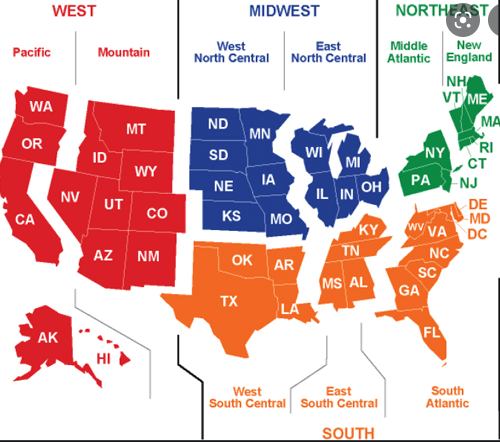

In [34]:
#classify states from centers['state'].value_counts() into Regions
west = ['CA',]
midwest = ['IL','MI','IA']
northeast = ['NY','MA','NJ','PA']
south = ['TX','GA','FL','TN','NC','VA']

#all orders
query = '''SELECT l."state", COUNT(t.*) AS numorders \
           FROM transactions_log AS t \
           JOIN logistics_supply_chain_network AS l \
           ON t."deliveryzipcode" = l."zipcode" \
           GROUP BY 1 \
           ORDER BY 2 DESC'''

cursor.execute(query)
r9data = cursor.fetchall()

r9colnames = [desc[0] for desc in cursor.description]
r9 = pd.DataFrame(r9data, columns = r9colnames)

r9

,state,numorders
0,NY,876511
1,IL,565063
2,TX,561383
3,GA,443226
4,CA,398918
5,FL,383846
6,TN,176292
7,NJ,5438
8,NC,4104
9,MI,4032


In [35]:
conditions  = [ r9["state"].isin(west), r9['state'].isin(midwest), r9['state'].isin(northeast), r9['state'].isin(south) ]
choices     = [ "west", 'midwest', 'northeast', 'south' ]
    
r9["region"] = np.select(conditions, choices, default=np.nan)

r9.groupby('region')['numorders'].sum().sort_values(ascending=False)

region
south        1572816
northeast     885883
midwest       573053
west          398918
Name: numorders, dtype: int64

<div class="alert alert-block alert-success">
    
    

### Bonus 2 (10 points): 
- To better plan for hiring hourly temporary workers on the peak-day of the week, OnMart has requested to find the busiest day of the week (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday or Sunday) that has the highest average for the number of order deliveries in every delivery zip code. Use the actual delivery date to determine the day of the week. **( Use Python - SQL - Postgres )**






<br>
    
</div>

In [36]:
#all orders
query = '''SELECT deliveryzipcode, actualdeliverydate, to_char(actualdeliverydate, 'Day') AS deliveryday, COUNT(*) AS totalorderdeliveries \
           FROM transactions_log \
           GROUP BY 1,2,3
           ORDER BY 1'''

cursor.execute(query)
r10data = cursor.fetchall()

r10colnames = [desc[0] for desc in cursor.description]
r10 = pd.DataFrame(r10data, columns = r10colnames)

r10

,deliveryzipcode,actualdeliverydate,deliveryday,totalorderdeliveries
0,10001,2018-01-08,Monday,1
1,10001,2018-01-09,Tuesday,1
2,10001,2018-01-10,Wednesday,2
3,10001,2018-01-12,Friday,6
4,10001,2018-01-13,Saturday,1
...,...,...,...,...
686591,91671,2021-01-03,Sunday,5
686592,91671,2021-01-04,Monday,2
686593,91671,2021-01-06,Wednesday,2
686594,91671,2021-01-07,Thursday,2


In [37]:
r10grouped = r10.groupby(['deliveryzipcode','deliveryday'])['totalorderdeliveries'].mean()

In [38]:
r10groupeddf = r10grouped.to_frame()
r10groupeddf = r10groupeddf.sort_values(by = ['deliveryzipcode','totalorderdeliveries'],ascending=[True,False])
r10groupeddf.head(100)

totalorderdeliveries
deliveryzipcode deliveryday                      
10001           Friday                   5.387097
                Wednesday                5.050000
                Sunday                   4.766667
                Thursday                 4.720721
                Saturday                 4.540984
...                                           ...
10014           Thursday                 5.983740
                Saturday                 5.200000
                Tuesday                  5.140351
10015           Sunday                   7.521368
                Friday                   6.696000

[100 rows x 1 columns]

In [39]:
r10groupeddf = r10groupeddf.groupby(level=0).apply(lambda r10groupeddf: r10groupeddf.sort_values('totalorderdeliveries')[-1:])
r10groupeddf.index = r10groupeddf.index.droplevel(0)
r10groupeddf

,,totalorderdeliveries
deliveryzipcode,deliveryday,
10001,Friday,5.387097
10002,Friday,5.361538
10003,Friday,5.395522
10004,Friday,6.382353
10005,Friday,6.260870
...,...,...
90103,Sunday,5.155172
90174,Friday,5.416000
90185,Friday,5.382114
